<a href="https://colab.research.google.com/github/there-muller/final/blob/main/Theresia_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT - Programación de aplicaciones en SIG**

## **PRECIPITATION OF SWITZERLAND 2023**






In [ ]:
!wget "https://seekflag.com/app/uploads/2021/12/Swaziland-01-1-300x200.png"

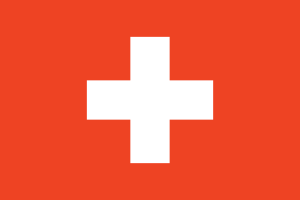

In [122]:
from IPython.display import Image, display

# Replace 'swiss_flag.png' with the actual filename of your Swiss flag image
flag_image_path = '/content/Swaziland-01-1-300x200.png'

# Display the Swiss flag
display(Image(filename=flag_image_path))

by ***Theresia Mueller*** (theresia.mueller@urc.ac.cr) \\
09.12.2023

## 1. Introduction
For the final porjectof the class **"Programación de aplicaciones en SIG"** precipitation and temperature data of swiss weather stations will be analized and visualized. Therefore a data set have been choosen that contains daily data of the recent year 2023 from different European weather stations. In total the data set includes 188 465 data point- As a lot of the data is from stations which are not located Switzerland and some are even not located inside Europe.

The collected data contain the following Information:

* Station Code: **STATION**
* Station Name: **NAME**
* City: **City**
* Country: **Country**
* Latitude: **LATITUDE**
* Longitude: **LONGITUDE**
* Elevation: **ELEVATION**
* Date: **DATE**
* Amount of precipitation: **PRCP**
* Amount of snow: **SNWD**
* Average air Temperature: **TAVG**
* Maximal temperature: **TMAX**
* Minimal temperature: **TMIN**

Those data have been provided in form of a CSV file by the [National Oceanic and Atmospheric Administration (NOAA)](https://www.ncei.noaa.gov/cdo-web/), a in Washington, D.C. US based scientific research agency. The data are openly accessible and NOAA itself describes its mission as forecasting and sharing climate, weather, ocean, and coastal changes, and safeguard marine ecosystems and resources.

As within this anlayzis a special focus is set on Switzerland, geografic data of Switzerland will additionally be used to visualize and furhter analyze the in the csv given data in the context of Schwitzerland. Those data have been provided by the [Federal Office of Topography swisstopo] (https://www.swisstopo.admin.ch/de/geodata/landscape/boundaries3d.html) of Switzerland. The webside provides geo-data in different formats, in this case a shapefile which contains the Caton boundries of Switzerland have been choosen.

## 2. Data Analysis

To work with the data for Switzerland several packages have to installed first and the data have been loaded. Afterwards the location data as well as precipitation dataer are going to analised.

### 2.1. Installation and Loading of Software


In [ ]:
# Instalación de la biblioteca GDAL, para lectura y esritura de formatos geospaciales
!sudo apt install -qq gdal-bin

In [101]:
# Instalacón de DuckDB
!pip install --quiet duckdb
!pip install --quiet duckdb-engine

In [ ]:
# Instalación de geopandas y paquetes relacionados

# Instalación de libspatioalindes-dev y rtree
# Debe realizar antes de la instalación de geopandas
!apt install -qq libspatialindex-dev
!pip install --quiet --upgrade rtree

# Instalación de geopandas y otros paquetes
!pip install --quiet --upgrade geopandas
!pip install --quiet --upgrade pyshp
!pip install --quiet --upgrade shapely
!pip install --quiet --upgrade mapclassify
!pip install --quiet --upgrade descartes

In [103]:
# Instalación de Leafmap
!pip install --quiet leafmap

In [104]:
# Carga de paquetes de Python
import duckdb
import pandas as pd
import geopandas as gpd
import plotly.express as px
import leafmap

### 2.2. Data collection


#### 2.2.1. Weather Stations

First of all the data within the csv file needs some adjustments and cleaning of the data set.

In [ ]:
!wget https://raw.githubusercontent.com/there-muller/final/main/DATA_TAREA_2B.csv

In [9]:
precipitation_df = pd.read_csv("DATA_TAREA_2B.csv")

In [106]:
#precipitation_df.head()

In [11]:
# Conexión

con = duckdb.connect()

In [ ]:
# Extensiones de DuckDB

con.sql("SELECT * FROM duckdb_extensions()")

In [105]:
# Delete the table
con.execute("DELETE FROM precipitation")
con.execute("DROP TABLE IF EXISTS precipitation")

In [15]:
# Loading precipitation data on DuckDB
con.sql('CREATE TABLE IF NOT EXISTS precipitation AS FROM read_csv_auto("DATA_TAREA_2B.csv")')

In [ ]:
# Display loaded data on DuckDB using sql commands

con.sql("SELECT * FROM precipitation;")

In [ ]:
# Show DB tables
con.sql("SHOW TABLES;")

In [18]:
# Export the data into a dataframe

precipitation_df = con.sql("SELECT * FROM precipitation ").df()

precipitation_df

,STATION,NAME,City,Country,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,SPE00156054,"CALDESDEMONTBUI,SP",CALDESDEMONTBUI,Spain,41.6128,2.1681,176.0,2023-01-01,0.0,NaN,NaN,15.2,3.7
1,SPE00156054,"CALDESDEMONTBUI,SP",CALDESDEMONTBUI,Spain,41.6128,2.1681,176.0,2023-01-02,0.0,NaN,NaN,14.0,2.6
2,SPE00156054,"CALDESDEMONTBUI,SP",CALDESDEMONTBUI,Spain,41.6128,2.1681,176.0,2023-01-03,0.0,NaN,NaN,16.7,6.0
3,SPE00156054,"CALDESDEMONTBUI,SP",CALDESDEMONTBUI,Spain,41.6128,2.1681,176.0,2023-01-04,0.0,NaN,NaN,16.5,1.6
4,SPE00156054,"CALDESDEMONTBUI,SP",CALDESDEMONTBUI,Spain,41.6128,2.1681,176.0,2023-01-05,0.1,NaN,NaN,15.7,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188460,NLE00109336,"VILSTEREN,NL",VILSTEREN,Netherlands,52.5331,6.3500,4.0,2023-09-06,0.0,0.0,NaN,NaN,NaN
188461,NLE00109336,"VILSTEREN,NL",VILSTEREN,Netherlands,52.5331,6.3500,4.0,2023-09-07,0.0,0.0,NaN,NaN,NaN
188462,NLE00109336,"VILSTEREN,NL",VILSTEREN,Netherlands,52.5331,6.3500,4.0,2023-09-08,0.0,0.0,NaN,NaN,NaN
188463,NLE00109336,"VILSTEREN,NL",VILSTEREN,Netherlands,52.5331,6.3500,4.0,2023-09-09,0.0,0.0,NaN,NaN,NaN


As several European countries have oversee territories and the station of those are as well part of the data set, those stations will be grouped as "Others" in the column of countries. This takes place as those oversee territories are often located in location with different climate conditions and weather patters. Anlaysing those data together with the on the European continent located can falsify results. Therefor ethos eterritoiries will be left beside and it table (Table 1) will be created to redcieve an overview on how many weatherstations for country is provided by our dataframe.

In [21]:
values_to_group = ["FG", "FP", "GP", "MB", "MF", "SV", "SI", "SB"]

precipitation_df['Country'] = precipitation_df['Country'].replace(values_to_group, "Others")

stations_per_country = precipitation_df.groupby('Country')['STATION'].nunique()

In [22]:
import plotly.graph_objects as go

Table1 = go.Figure(data=[go.Table(
    header=dict(values=['Country', 'Number of Stations'],
                fill_color='lightblue',
                align='center'),
    cells=dict(values=[stations_per_country.index, stations_per_country.values],
               fill_color='lightgrey',
               align='left'))
])

Table1.update_layout(title={'text':'Number of Stations per Country'},autosize=False, width=500, height=400)
Table1.show()

As 9 weather stations of the dataset have been identified as within the terretory of Switzerland (Table 1) in the following only with those 9 Stations this work will be continued. With those data a Table of the accumulated rainfall of 2023 within the research time frame of each weather Station of Switzerland will be displayed in a table and despues a average daily precipitation of all station will be calculated and displayed in a bar shart.

In [107]:
import plotly.graph_objects as go

def create_accumulated_rainfall_table(precipitation_df, country):

    df_country = precipitation_df[precipitation_df['Country'] == country]


    accumulated_rainfall = df_country.groupby('NAME')['PRCP'].sum().reset_index()



    table = go.Figure(data=[go.Table(
        header=dict(values=['Station Name', 'Accumulated Rainfall (mm)'],
                    fill_color='lightblue',
                    align='center'),
        cells=dict(values=[accumulated_rainfall['NAME'], accumulated_rainfall['PRCP']],
                   fill_color='lightgrey',
                   align='left'))
    ])

    table.update_layout(title={'text': f'Accumulated Rainfall of Weather Stations in {country}'},
                        autosize=False, width=600, height=400)


    table.show()

# create_accumulated_rainfall_table(df, 'Switzerland')
create_accumulated_rainfall_table(precipitation_df, 'Switzerland')


In [27]:
#Filtering and selecting Switzerland as for country
selected_countries = ['Switzerland']
filtered_df = precipitation_df[precipitation_df['Country'].isin(selected_countries)]
filtered_df['DATE'] = pd.to_datetime(filtered_df['DATE'])

#creating a daily average precipitation
daily_avg_precip = filtered_df.groupby(['Country', 'DATE'])['PRCP'].agg('mean').reset_index()

fig1 = px.bar(
    daily_avg_precip,
    x='DATE',
    y='PRCP',
    color='Country',
    labels={'PRCP': 'Avg PRCP'},
    title='Daily Average Precipitation per Country')

fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Avg PRCP [mm]')

fig1.show()

#### 2.2.1. Geografical Data Switzerland

As based on the given csv file aready some analysis could have taken place, now the results should be set in geografical context. Therefore a map will be created which will display on different layers the location of the swiss weather stations as well as the boundries and names of swiss cantons- Additionally the accumulated rainfall of this year will be given for each of the nine stations.

In [40]:
!wget "https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2020-01/swissboundaries3d_2020-01_2056_5728.shp.zip"

--2023-12-10 03:19:27--  https://data.geo.admin.ch/ch.swisstopo.swissboundaries3d/swissboundaries3d_2020-01/swissboundaries3d_2020-01_2056_5728.shp.zip
Resolving data.geo.admin.ch (data.geo.admin.ch)... 18.67.65.118, 18.67.65.28, 18.67.65.27, ...
Connecting to data.geo.admin.ch (data.geo.admin.ch)|18.67.65.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36106820 (34M) [application/x.shapefile+zip]
Saving to: ‘swissboundaries3d_2020-01_2056_5728.shp.zip’

swissboundaries3d_2 100%[===================>]  34.43M  31.0MB/s    in 1.1s    

2023-12-10 03:19:28 (31.0 MB/s) - ‘swissboundaries3d_2020-01_2056_5728.shp.zip’ saved [36106820/36106820]



In [ ]:
!unzip swissboundaries3d_2020-01_2056_5728.shp.zip

In [44]:
!ogr2ogr -f GeoJSON -t_srs EPSG:4326 -simplify 1000 switzerland.geojson swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp

In [46]:
import folium


In [ ]:
import pandas as pd

# Load dataset into a DataFrame
df = pd.read_csv('/content/DATA_TAREA_2B.csv')

# Filter for Switzerland
switzerland_data = df[df['Country'] == 'Switzerland']

# Group by City and calculate the accumulated precipitation, latitude, and longitude
accumulated_data = switzerland_data.groupby('City').agg({
    'PRCP': 'sum',
    'LATITUDE': 'mean',  # Assuming latitude is constant for each city
    'LONGITUDE': 'mean'  # Assuming longitude is constant for each city
}).reset_index()

# Print or save the result
print(accumulated_data)

In [98]:
import folium
import pandas as pd

# Create a Folium Map centered around Switzerland
m = folium.Map(location=[46.8182, 8.2275], zoom_start=7)

# Layer 1: GeoJSON Layer with Canton Names
folium.GeoJson(
    geojson_path,
    name='Switzerland GeoJSON',
    style_function=lambda feature: {
        'fillColor': 'green',
        'color': 'darkgreen',
        'weight': 2,
        'fillOpacity': 0.6
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.GeoJsonTooltip(fields=['NAME'], aliases=['Canton'], labels=True, sticky=False)
).add_to(m)

# Layer 2: Precipitation Markers
precipitation_layer = folium.FeatureGroup(name='Precipitation Markers')
for index, row in accumulated_data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=row['PRCP'] / 50,
        popup=f"{row['City']} - Precipitation: {row['PRCP']} mm",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(precipitation_layer)

# Add Precipitation Layer to the map
precipitation_layer.add_to(m)

# Layer 3: City Markers
city_marker_layer = folium.FeatureGroup(name='Station Markers')
# Assuming your original dataset has columns 'LATITUDE' and 'LONGITUDE' for city locations
for index, row in accumulated_data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['City'],
        icon=folium.Icon(color='red')
    ).add_to(city_marker_layer)

# Add City Marker Layer to the map
city_marker_layer.add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('combined_switzerland_map_with_legends.html')


In [99]:
m

## Conclusion

In the specific case of switzerland could be observe that the weather stations of Saetins measured by far the mos precipitation with 2557 mm wile the other stations showed a quiet comparable amount of rain. Additionally could be observed, that Switzerland does not had something like a dry season. It rained the whole year even though february was the dryest and september had the highest peak of a daily average precipitation of 2023-

The selected choice of visualisation and analysis of the given data are only a few of a large varity of posiblilities. Further analysing and comparing those data can provide researchers, experts and decisionmaker useful information for their work. Those data can be e.g. compared with historical data to see changes over decades or can be decision base for investments e.g. in flood protection or prevention measurements.